## **Programming Assignment 3: Deep Learning**
### ENPM808Y — Fundamentals of AI and Machine Learning — Spring 2023
Project Due: Thrusday, March 9, 2023 at 11:59pm

Late Policy: 10% penalty


Motivation. This project is designed to familiarize you with using ML frameworks for deep learning. In particular, there are the following learning goals:

Practice writing code that implements neural network training in an ML framework, such as PyTorch, that supports backpropagation.


**Submission**

You will submit this notebook to ELMS.

# Introduction to Neural Networks 

## Introduction

Neural networks are becoming increasingly more popular and are responsible for some of the most cutting edge advancements in data science including image and speech recognition. They have also been transformative in reducing the need for intensive and often time intensive feature engineering needed for traditional supervised learning tasks. In this lesson, we'll investigate the architecture of neural networks.

## Objectives

You will be able to:

- Explain what neural networks are and what they can achieve 
- List the components of a neural network 
- Explain forward propagation in a neural network 
- Explain backward propagation and discuss how it is related to forward propagation 

## What is a neural network? 

Let's start with an easy example to get an idea of what a neural network is. Imagine a city has 10 ice cream vendors. We would like to predict what the sales amount is for an ice cream vendor given certain input features. Let's say you have several features to predict the sales for each ice cream vendor: the location, the way the ice cream is priced, and the variety in the ice cream offerings.

Let's look at the input feature *location*. You know that one of the things that really affects the sales is how many people will walk by the ice cream shop, as these are all potential customers. And realistically, the volume of people passing is largely driven by the *location*. 

Next, let's look at the input feature *pricing*. How the ice cream is priced really tells us something about the affordability, which will affect sales as well. 

Last, let's look at the *variety in offering*. When an ice cream shop offers a lot of different ice cream flavors, this might be perceived as a higher quality shop just because customers have more flavors to choose from (and might really like that!). On the other hand, *pricing* might also affect perceived quality: customers might feel that the quality is higher if the prices are higher. This shows that several inputs might affect one hidden feature, as these features in the so-called "hidden layer" are called. 

In reality, all features will be connected with all nodes in the hidden layer, and weights will be assigned to the edges (more about this later), as you can see in the network below. That's why networks like this are also referred to as **densely connected neural networks**. 
![any name you like](https://drive.google.com/uc?export=view&id=1yhWkR_cUSxkQOw93d5SR7cJKMjGVSgA8)



When we generalize this, a neural network looks like the configuration below. 

As you can see, to implement a neural network, we need to feed it the inputs $x_i$ (location, pricing, and variety in this example) and the outcome $y$ (pricing in this example), and all the features in the middle will be figured out automatically in the network. That's why this layer is called the **hidden layer**, with the nodes representing **hidden units**.  

![](https://drive.google.com/uc?export=view&id=1bd8DxbAAvnY-NXqGmOw2ALTKKjan3VBG)




## The power of deep learning 

In our previous example, we have three input units, a hidden layer with 4 units, and 1 output unit. Notice that networks come in all shapes and sizes. This is only one example of what deep learning is capable of! The network described above can be extended almost endlessly:

- We can add more features (nodes) in the input layer 
- We can add more nodes in the hidden layer. Also, we can simply add more hidden layers. This is what turns a neural network into a "deep" neural network (hence, deep learning)
- We can also have several nodes in the output layer  

![](https://drive.google.com/uc?export=view&id=1ruAlvIzRtCBy5kl_b62AfRPdcfSsip4d)

And there is one more thing that makes deep learning extremely powerful: unlike many other statistical and machine learning techniques, deep learning can deal extremely well with **unstructured data**.


In the ice cream vendor example, the input features can be seen as **structured data**. The input features very much take a form of a "classical" dataset: observations are rows, features are columns. Examples of **unstructured data**, however, are images, audio files, text data, etc. Historically, and unlike humans, machines had a very hard time interpreting unstructured data. Deep learning was really able to drastically improve machine performance when using unstructured data!

To illustrate the power of deep learning, we describe some applications of deep learning below: 

| x | y |
|---|---|
| features of an ice cream shop  | sales |
| Pictures of cats vs dogs | cat or dog? |
| Pictures of presidents | which president is it? |
| Dutch text | English text |
| audio files | text |
|  ... | ... |         

 
 
Types of neural networks: 

- Standard neural networks
- Convolutional neural networks (input = images, video)
- Recurrent neural networks (input = audio files, text, time series data)
- Generative adversarial networks

## An introductory example

### Problem statement and matrix representation

![title](https://drive.google.com/uc?export=view&id=1lPzz5KzZwd6tbwI_jmx9MGOx3LwQUHJd)

You'll see that there is quite a bit of theory and mathematical notation needed when using neural networks. We'll introduce all this for the first time by using an example.
Imagine we have a dataset with images. Some of them have Santa in it, others don't. We'll use a neural network to train the model so it can detect whether Santa is in a picture or not.

As mentioned before, this is a kind of problem where the input data is composed of images. Now how does Python read images? To store an image, your computer stores three matrices which correspond with three color channels: red, green, and blue (also referred to as RGB). The numbers in each of the three matrices correspond with the pixel intensity values in each of the three colors. The picture below denotes a hypothetical representation of a 4 x 4 pixel image (note that 4 x 4 is tiny, generally you'll have much bigger dimensions). Pixel intensity values are on the scale [0, 255].

![title](https://drive.google.com/uc?export=view&id=1rt5Y-IOnVhEvXgxE21OauK8B3ITlbVan)


Having three matrices associated with one image, we'll need to modify this shape to get to one input feature vector. You'll want to "unrow" your input feature values into one so-called "feature vector". You should start with unrowing the red pixel matrix, then the green one, then the blue one. Unrowing the RGB matrices in the image above would result in:

 $x = \begin{bmatrix} 35  \\ 19 \\  \vdots \\ 9 \\7 \\\vdots \\ 4 \\ 6 \\ \vdots \end{bmatrix}$

The resulting feature vector is a matrix with one column and 4 x 4 x 3 = 48 rows. Let's introduce some more notation to formalize this all.

$(x, y)$ = a training sample, where $x \in  \mathbb{R}^n , y \in \{0,1\}$. Note that $n$ is the number of inputs in the feature vector (48 in this example).

Let's say you have one training sample. Your training set then looks like this: $\{(x^{(1)},y^{(1)}), \ldots, (x^{(l)},y^{(l)})\}$ 

Similarly, let's say the test set has $m$ test samples.

Note that the resulting matrix $x$ has dimensions ($n$ x $l%$), and looks like this:

 $ \hspace{1.1cm} x^{(1)} \hspace{0.4cm} x^{(2)} \hspace{1.4cm} x^{(l)} $
 
 $x $= $\begin{bmatrix} 35 & 23 & \cdots & 1\\ 19 & 88 &\cdots & 230\\  \vdots & \vdots & \ddots & \vdots \\ 9 & 3 &\cdots & 222 \\7 &166 &\cdots  &43 \\ \vdots & \vdots & \ddots & \vdots  \\ 4 & 202 & \cdots & 98 \\ 6 & 54 & \cdots & 100 \\ \vdots & \vdots & \ddots & \vdots \end{bmatrix}$

The training set labels matrix has dimensions $(1$ x $ l)$, and would look something like this:

$y $= $\begin{bmatrix} 1 & 0 & \cdots & 1 \end{bmatrix}$

where 1 means that the image contains a Santa, 0 means there is no Santa in the image.


Before working on the assignment Please run through the below tutorial to play around with Pytorch and Neural Network

* [Neural Network Tutorial](https://colab.research.google.com/drive/1t5twWABoVOqh2qIiMCh3CWbpTiJY4VS-?usp=sharing)

* [Pytorch Tutorial](https://colab.research.google.com/drive/1ohhSO5KYXRyuTw4kLxGmS0Y1Uc6cCYbP?usp=sharing)

#### **Objective:**
To build a simple convolutional neural network in PyTorch and train it to recognize handwritten digits using the MNIST dataset

## **Introduction**
Classifying handwritten digits is a classic problem in the field of computer vision and has been used as a benchmark dataset for machine learning algorithms for decades. The [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) is a commonly used dataset for this task, which consists of 70,000 grayscale images of handwritten digits, each with a resolution of 28x28 pixels. The task is to train a machine learning model that can accurately classify each image into its corresponding digit (0-9).

Notebook Outline:

* Installing necessary packages
* Importing necessary libraries and dataset
* Data preprocessing
* Defining the CNN architecture
* Training the model
* Testing the model
* Conclusion

**1. Installing necessary  packages**

In this section, you will install any necessary packages and libraries needed to run the notebook. This includes installing PyTorch, which is a popular deep learning framework.

In [1]:
!pip install torch torchvision

Defaulting to user installation because normal site-packages is not writeable


**2. Importing  necessary  libraries  and  dataset**

In this section, you will import the necessary libraries and modules for building and training the model. This includes importing the MNIST dataset from PyTorch's built-in datasets module.

In [2]:
# Importing torch and torchvision
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [3]:
# Hyperparameters

n_epochs = 3 # Number of Epochs
batch_size_train = 64 # Training Batch Size
batch_size_test = 1000 # Testing Batch Size
learning_rate = 0.01 # Learning Rate for Gradient Descent ( Hyperparameter )
momentum = 0.5
log_interval = 10

random_seed = 1 
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

**3. Data preprocessing**

In this section, you will preprocess the data by converting the images to PyTorch tensors, normalizing the pixel values, and splitting the dataset into training and testing sets.

In [4]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [5]:
# Lets look into test_loader Dataloader
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [6]:
# let's see what one test data batch consists of.
example_data.shape

torch.Size([1000, 1, 28, 28])

So one test data batch is a  tensor of shape[1000,1,28,28]: 

This means we have 1000 examples of 28x28 pixels in grayscale (i.e. no rgb channels, hence the one).

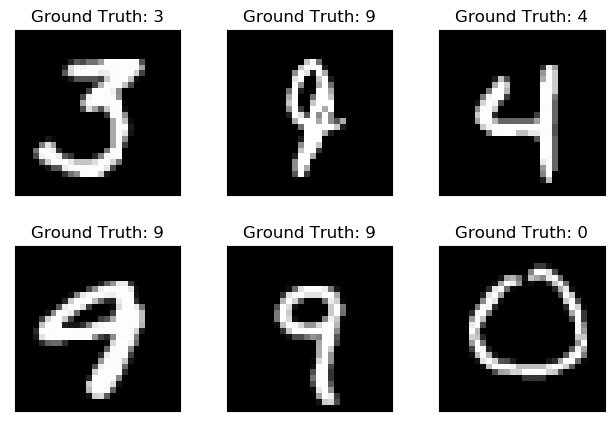

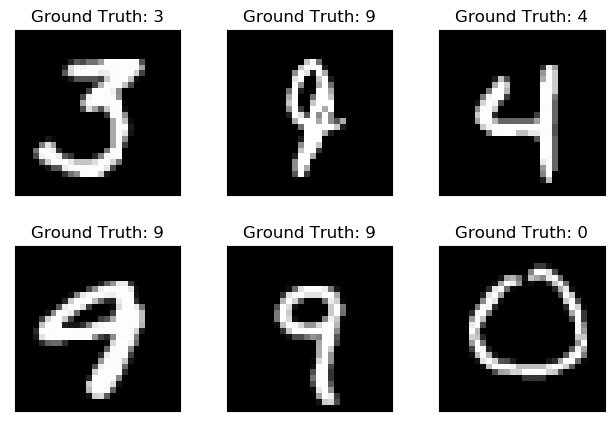

In [7]:
# plot some of them using matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

**4. Defining the CNN architecture**
 
In this section, you will define the architecture of the convolutional neural network (CNN) used for classification. This includes defining the number and type of layers, activation functions, and pooling layers used. 

Broadly speaking we can think of the torch.nn layers as which contain trainable parameters while torch.nn.functional are purely functional. The forward() pass defines the way we compute our output using the given layers and functions.

The Net class is a subclass of nn.Module and defines the layers of the CNN. 

The constructor (__init__) method initializes each layer of the CNN, including the convolutional layers, pooling layers, and linear layers. The forward method defines the forward pass through the network, which consists of applying the convolutional and pooling layers to the input image, flattening the output, and passing it through the linear layers.


Implement a PyTorch model that takes a 28x28 grayscale image tensor as input and outputs a log probability distribution over 10 classes (corresponding to the digits 0-9). Your model should have the following layers:

* A 2D convolutional layer with 10 output channels, a 5x5 kernel size, and ReLU activation.
* A 2D max pooling layer with a 2x2 kernel size.
* Another 2D convolutional layer with 20 output channels, a 5x5 kernel size, and ReLU activation.
* A 2D dropout layer with a probability of dropout set to 0.* 5.
A fully connected layer with 50 output units and ReLU activation.
* Another fully connected layer with 10 output units (one for each class) and log softmax activation.

 Your implementation should use the nn.Module class and define the layers in the init function, and implement the forward pass through the layers in the forward function."


In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

The *optim.SGD()* function is a stochastic gradient descent optimizer that updates the parameters of the CNN based on the gradients of the loss function with respect to those parameters. We pass net.parameters() to the optimizer to tell it to optimize the parameters of the net model. We also specify a learning rate (lr) of 0.01 and a momentum (momentum) of 0.5, which are commonly used hyperparameters for training CNNs.

In [9]:
# Initialize the Network
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
# Print out the model 
network


Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

**5. Training the model**

In this section, you will train the CNN using the training data. This includes defining the loss function and optimization algorithm, setting the hyperparameters of the model, and iterating through the training data to update the weights of the model.

Time to build our training loop. First we want to make sure our network is in training mode. Then we iterate over all training data once per epoch. Loading the individual batches is handled by the DataLoader. First we need to manually set the gradients to zero using optimizer.zero_grad() since PyTorch by default accumulates gradients. We then produce the output of our network (forward pass) and compute a negative log-likelihodd loss between the output and the ground truth label. The backward() call we now collect a new set of gradients which we propagate back into each of the network's parameters using optimizer.step(). For more detailed information about the inner workings of PyTorch's automatic gradient system, see the [official docs](https://pytorch.org/docs/stable/notes/autograd.html#) for autograd (highly recommended).

In [10]:
# Logging to save the losses later for plotting 
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

We'll run our test loop once before even starting the training to see what accuracy/loss we achieve just with randomly initialized network parameters. Can you guess what our accuracy might look like for this case?


**Note: Make sure you create a results directory in the Files section which you can find in the left side of the colab**

In [11]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), 'model.pth')
      torch.save(optimizer.state_dict(), 'optimizer.pth')

**6. Testing the model**

In this section, you will test the performance of the trained model on the testing dataset. This includes calculating the accuracy and other performance metrics, as well as generating a confusion matrix to visualize the model's performance.


"Implement a PyTorch test function that evaluates the performance of a neural network model on a test dataset using cross-entropy loss and accuracy metrics. Your function should take as input a PyTorch model (network), a test data loader (test_loader), and two empty lists (test_losses and test_accs) to store the test losses and accuracies over time.

Inside your test function, you should:

* Put the model into evaluation mode by calling network.eval().
* Initialize the test_loss and correct variables to zero.
* Disable gradient computations by wrapping the test loop with torch.no_grad().
* Loop over the test data using the test_loader, and for each batch:
  - a. Pass 
the batch of input data (data) through the model (network) to get the output logits (output).
  - b. Calculate the cross-entropy loss between the output logits and the target labels (target) using F.nll_loss.
  - c. Add the batch loss to the test_loss variable.
  - d. Compute the predicted labels (pred) by taking the argmax of the output logits along the class dimension.
  - e. Update the correct variable by adding the number of correct predictions in the batch (i.e. where pred equals target).
* Calculate the average test loss by dividing the test_loss variable by the total number of test samples.
* Append the average test loss to the test_losses list.
* Calculate the test accuracy as the percentage of correct predictions over the total number of test samples.
* Append the test accuracy to the test_accs list.
* Print the test set loss and accuracy using the formatted string '\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)).

Your implementation should closely follow this template and use PyTorch functions as appropriate."

In [14]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))  

In [15]:
""" Time to run the training! We'll manually add a test() call before we 
    loop over n_epochs to evaluate our model with randomly initialized parameters."""

test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/tmp/ipykernel_13907/161431047.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3096, Accuracy: 924/10000 (9%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.313179
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.300776
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.298872
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.276723
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.241102
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.248662
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.189547
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.146399
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.107701
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.011356
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.843857
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.758839
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.672644
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.687645
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.426628
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.284204
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.318824
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.445287
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.140686
Train Epoch: 1 [12160/6

In [16]:
print(len(test_counter))
print(len(test_losses))

4
4


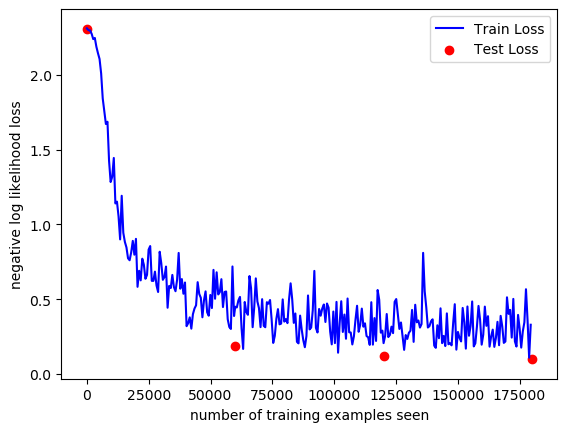

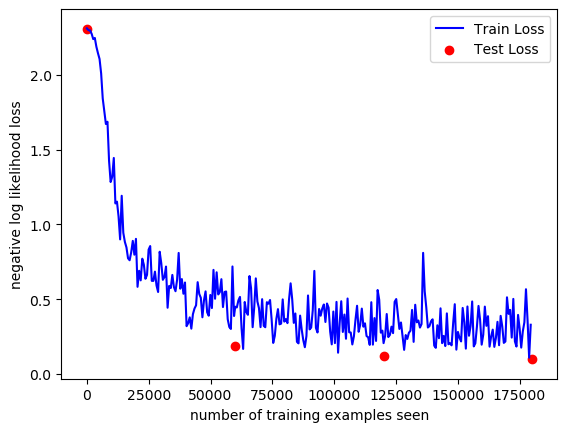

In [17]:
# Evaluating the Model's Performance

""" With just 3 epochs of training we already managed to 
achieve 97% accuracy on the test set! We started 
out with randomly initialized parameters and as 
expected only got about 10% accuracy on the test set before starting the training. """

# Let's plot our training curve.
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

In [18]:
with torch.no_grad():
  output = network(example_data)

/tmp/ipykernel_13907/161431047.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


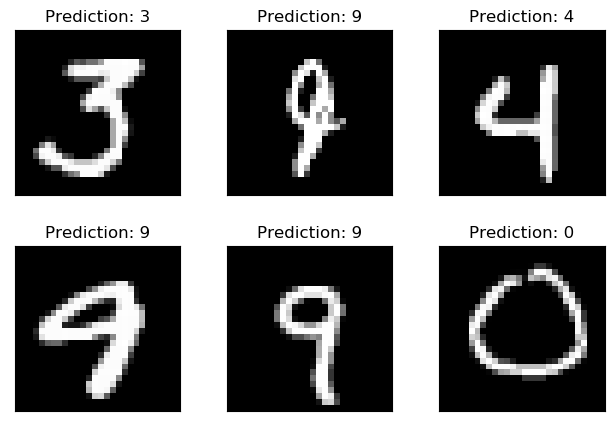

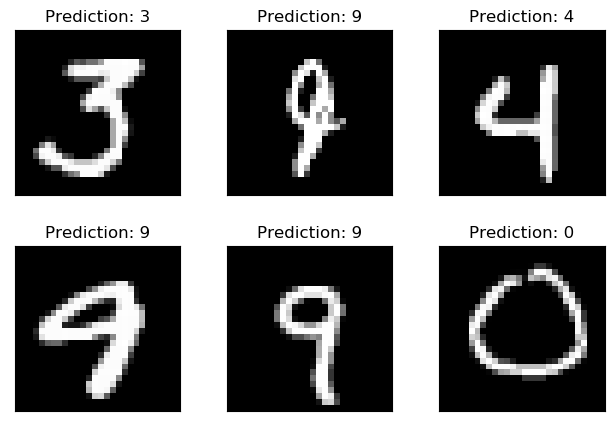

In [19]:
# Visualization of the Predicted Results
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
fig

In [20]:
# Continued Training from Checkpoints 

""" Now let's continue training the network, or rather see how we can continue training from the state_dicts we saved during 
our first training run. We'll initialize a new set of network and optimizers. """

continued_network = Net()
continued_optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                                momentum=momentum)



In [21]:
""" Using .load_state_dict() we can now load the internal state of the network and 
optimizer when we last saved them. """

network_state_dict = torch.load("model.pth")
continued_network.load_state_dict(network_state_dict)

optimizer_state_dict = torch.load("optimizer.pth")
continued_optimizer.load_state_dict(optimizer_state_dict)

In [22]:
"""Again running a training loop should immediately pick up the training where we left it. 
To check on that let's simply use the same lists as before to keep track of the loss values. """

for i in range(4,9):
  test_counter.append(i*len(train_loader.dataset))
  train(i)
  test()

/tmp/ipykernel_13907/161431047.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 4 [0/60000 (0%)]	Loss: 0.189311
Train Epoch: 4 [640/60000 (1%)]	Loss: 0.366426
Train Epoch: 4 [1280/60000 (2%)]	Loss: 0.356057
Train Epoch: 4 [1920/60000 (3%)]	Loss: 0.400004
Train Epoch: 4 [2560/60000 (4%)]	Loss: 0.508479
Train Epoch: 4 [3200/60000 (5%)]	Loss: 0.134980
Train Epoch: 4 [3840/60000 (6%)]	Loss: 0.272883
Train Epoch: 4 [4480/60000 (7%)]	Loss: 0.330658
Train Epoch: 4 [5120/60000 (9%)]	Loss: 0.164976
Train Epoch: 4 [5760/60000 (10%)]	Loss: 0.198512
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.167126
Train Epoch: 4 [7040/60000 (12%)]	Loss: 0.146805
Train Epoch: 4 [7680/60000 (13%)]	Loss: 0.221383
Train Epoch: 4 [8320/60000 (14%)]	Loss: 0.399237
Train Epoch: 4 [8960/60000 (15%)]	Loss: 0.450667
Train Epoch: 4 [9600/60000 (16%)]	Loss: 0.154932
Train Epoch: 4 [10240/60000 (17%)]	Loss: 0.161595
Train Epoch: 4 [10880/60000 (18%)]	Loss: 0.470807
Train Epoch: 4 [11520/60000 (19%)]	Loss: 0.154093
Train Epoch: 4 [12160/60000 (20%)]	Loss: 0.252178
Train Epoch: 4 [12800/60000 (

In [23]:
test_counter

[0, 60000, 120000, 180000, 240000, 300000, 360000, 420000, 480000]

In [24]:
test_losses

[2.3095823486328126,
 0.18719099578857423,
 0.11607195434570312,
 0.0994322036743164,
 0.08065581817626953,
 0.07189129791259766,
 0.06903397026062012,
 0.06149475708007812,
 0.0569131649017334]

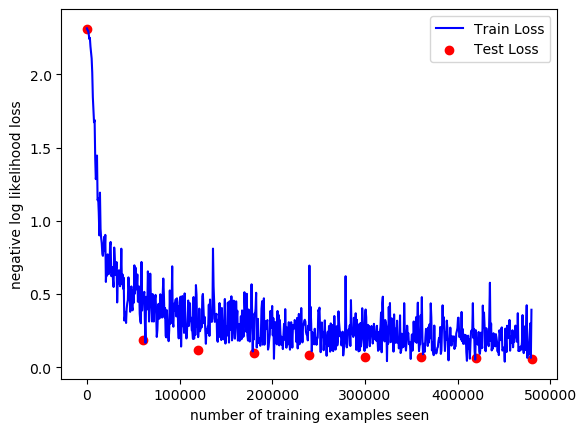

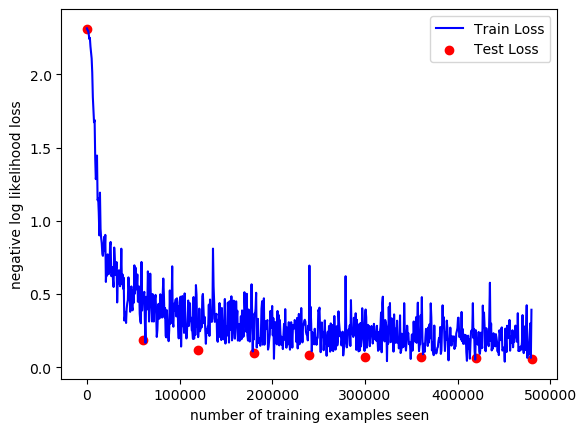

In [25]:
# Let's visualize this to further inspect the training progress.

fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

**7. Conclusion**


TODO: 

* Explore the effect of increasing or decreasing the number of channels in convolutional layers.

* Try doubling or halving the number of channels in each layer, and observe the effect on training and validation accuracy.

* Adjust the learning rate and batch size hyperparameters to see how this affects model performance

In this final section, you will summarize the results of the project, discuss any challenges or interesting findings, and suggest areas for future improvement.

**Results**

With the combination of convolution and drop off layers, as well as apply ReLU activiation, we were able to achieve a low test and training loss (around an average of 0.1) while obtaining high levels of accuracy for both (around 97%). As we increased the number of epochs, the accruacy increased to 98% and losses decreased to 0.057.

**Challenges Encountered**

Challenges I encountered were figuring out the proper ways of iterating through the training and test datasets. Also figuring out how to properly implement the convolution layers, ReLU activation, and dropoff layers took some researching. 

**Interesting Findings**

- Increasing or Decreasing the number of channels will have a very minor effect because changing the number of channels will proportionally change the dimensions of the channel. Utlimately the pixel count has to stay the same. When this was attempted it had little effect on the results.

- Doubling the number of layers increases the ability of the neural network to grasp information from the input data. This is because initial layers typically find simple patterns in the image, while deeper layers unearth more abstract and complex patterns.

- Decreasing learning rate increases the performance of the model, but training takes more time. Increasing batch size increases performance of the model, but training takes more time.



## Additional Resources


- [Visualize CNN training](https://cs.stanford.edu/people/karpathy/convnetjs/)
- [Visualize Convolution Layers](https://adamharley.com/nn_vis/)
- [CNN Explainer](https://poloclub.github.io/cnn-explainer/)
- [CNN In-depth Explanation](https://www.youtube.com/@far1din619/videos)
- [Neural Network Visualization](https://www.youtube.com/watch?v=KuXjwB4LzSA&ab_channel=3Blue1Brown)

- https://playground.tensorflow.org/